# Tellurium Introduction - part II:

## Advanced topic - Antimony modules!

### A minimal example:

/usr/lib/python2.7/dist-packages/tellurium/tellurium.py:66: UserWarning:

plotly could not be initialized. Unable to use Plotly for plotting.



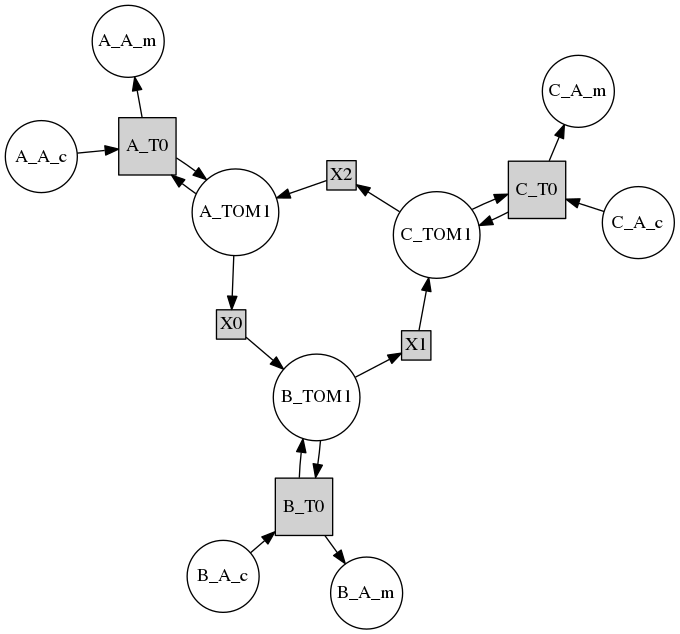

In [1]:
import tellurium as te;# te.setDefaultPlottingEngine('matplotlib')
import matplotlib.pyplot as plt
r = te.loada('example.antimony')
def draw(model):
    diagram = te.visualization.SBMLDiagram(model.getSBML())
    diagram.draw()
    
    
#r.draw()
#draw(r)

model_circle = '''
import "example.antimony"

model circle
    A: example()
    B: example()
    C: example()
    
    X0: A.TOM1 -> B.TOM1;
    X1: B.TOM1 -> C.TOM1;
    X2: C.TOM1 ->  A.TOM1;
        
end

'''

circle = te.loada(model_circle)
draw(circle)




In [29]:
circle = te.loada(model_circle)
print circle.getAntimony()

// Created by libAntimony v2.9.4
model *circle()

  // Compartments and Species:
  compartment A_cell, A_mitochondria, B_cell, B_mitochondria, C_cell, C_mitochondria;
  species A_TOM1 in A_cell, A_A_c in A_cell, A_A_m in A_mitochondria, B_TOM1 in B_cell;
  species B_A_c in B_cell, B_A_m in B_mitochondria, C_TOM1 in C_cell, C_A_c in C_cell;
  species C_A_m in C_mitochondria;

  // Assignment Rules:
  A_kineticLaw := A_k1*A_TOM1*(A_A_c - A_A_m)/A_I;
  B_kineticLaw := B_k1*B_TOM1*(B_A_c - B_A_m)/B_I;
  C_kineticLaw := C_k1*C_TOM1*(C_A_c - C_A_m)/C_I;

  // Reactions:
  A_T0: A_A_c + A_TOM1 -> 2 A_A_m + A_TOM1; A_kineticLaw;
  B_T0: B_A_c + B_TOM1 -> 2 B_A_m + B_TOM1; B_kineticLaw;
  C_T0: C_A_c + C_TOM1 -> 2 C_A_m + C_TOM1; C_kineticLaw;
  X0: A_TOM1 -> B_TOM1; ;
  X1: B_TOM1 -> C_TOM1; ;
  X2: C_TOM1 -> A_TOM1; ;

  // Species initializations:
  A_TOM1 = 10;
  A_A_c = 100;
  A_A_m = 1;
  B_TOM1 = 10;
  B_A_c = 100;
  B_A_m = 1;
  C_TOM1 = 10;
  C_A_c = 100;
  C_A_m = 1;

  // Compartment

## Deletions: delete species in submodels

In [30]:
model_circle = '''
import "example.antimony"

model circle
    A: example()
    B: example()
    C: example()
    
    X0: A.TOM1 -> B.TOM1;
    X1: B.TOM1 -> C.TOM1;
    X2: C.TOM1 ->  A.TOM1;
    
    delete C.A_m
    C.kineticLaw := 0.1;
    
end

'''

circle = te.loada(model_circle)
print circle.getAntimony()

// Created by libAntimony v2.9.4
model *circle()

  // Compartments and Species:
  compartment A_cell, A_mitochondria, B_cell, B_mitochondria, C_cell, C_mitochondria;
  species A_TOM1 in A_cell, A_A_c in A_cell, A_A_m in A_mitochondria, B_TOM1 in B_cell;
  species B_A_c in B_cell, B_A_m in B_mitochondria, C_TOM1 in C_cell, C_A_c in C_cell;

  // Assignment Rules:
  A_kineticLaw := A_k1*A_TOM1*(A_A_c - A_A_m)/A_I;
  B_kineticLaw := B_k1*B_TOM1*(B_A_c - B_A_m)/B_I;
  C_kineticLaw := 0.1;

  // Reactions:
  A_T0: A_A_c + A_TOM1 -> 2 A_A_m + A_TOM1; A_kineticLaw;
  B_T0: B_A_c + B_TOM1 -> 2 B_A_m + B_TOM1; B_kineticLaw;
  C_T0: C_A_c + C_TOM1 -> C_TOM1; ;
  X0: A_TOM1 -> B_TOM1; ;
  X1: B_TOM1 -> C_TOM1; ;
  X2: C_TOM1 -> A_TOM1; ;

  // Species initializations:
  A_TOM1 = 10;
  A_A_c = 100;
  A_A_m = 1;
  B_TOM1 = 10;
  B_A_c = 100;
  B_A_m = 1;
  C_TOM1 = 10;
  C_A_c = 100;

  // Compartment initializations:
  A_cell = 100;
  A_mitochondria = 10;
  B_cell = 100;
  B_mitochondria = 10;
  

### Usually, deletion of a species overkill. 
### Instead, overwrite assignments or kinetics!

In [31]:
model_circle = '''
import "example.antimony"

model circle
    A: example()
    B: example()
    C: example()
    
    X0: A.TOM1 -> B.TOM1;
    X1: B.TOM1 -> C.TOM1;
    X2: C.TOM1 ->  A.TOM1;
    
    # Assignment rule-> ODE:
    C.kineticLaw := ;
    C.kineticLaw '= 0.1;
    C.kineticLaw = 0.1;
    
    # Delete reaction:
    #delete A.T0
    
    # Overwrite reaction
    A_TO: A.A_c -> A.A_m; 0.1; # Note, the Underline, Submodels are flattened in sbml!
end

'''

circle = te.loada(model_circle)
print circle.getAntimony()

// Created by libAntimony v2.9.4
model *circle()

  // Compartments and Species:
  compartment A_cell, A_mitochondria, B_cell, B_mitochondria, C_cell, C_mitochondria;
  species A_TOM1 in A_cell, A_A_c in A_cell, A_A_m in A_mitochondria, B_TOM1 in B_cell;
  species B_A_c in B_cell, B_A_m in B_mitochondria, C_TOM1 in C_cell, C_A_c in C_cell;
  species C_A_m in C_mitochondria;

  // Assignment Rules:
  A_kineticLaw := A_k1*A_TOM1*(A_A_c - A_A_m)/A_I;
  B_kineticLaw := B_k1*B_TOM1*(B_A_c - B_A_m)/B_I;

  // Rate Rules:
  C_kineticLaw' = 0.1;

  // Reactions:
  A_T0: A_A_c + A_TOM1 -> 2 A_A_m + A_TOM1; A_kineticLaw;
  B_T0: B_A_c + B_TOM1 -> 2 B_A_m + B_TOM1; B_kineticLaw;
  C_T0: C_A_c + C_TOM1 -> 2 C_A_m + C_TOM1; C_kineticLaw;
  X0: A_TOM1 -> B_TOM1; ;
  X1: B_TOM1 -> C_TOM1; ;
  X2: C_TOM1 -> A_TOM1; ;
  A_TO: A_A_c -> A_A_m; 0.1;

  // Species initializations:
  A_TOM1 = 10;
  A_A_c = 100;
  A_A_m = 1;
  B_TOM1 = 10;
  B_A_c = 100;
  B_A_m = 1;
  C_TOM1 = 10;
  C_A_c = 100;
  C_A_m = 1